In [1]:
import numpy
import math
from scipy import integrate
from matplotlib import pyplot

In [2]:
%matplotlib inline

In [3]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [4]:
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81

u = numpy.array([z0, b0])

z = numpy.zeros(N)
z[0] = z0

In [5]:
for n in range(1,N):
    u = u + dt*numpy.array([u[1],g*(1-u[0]/zt)])
    z [n] = u [0]

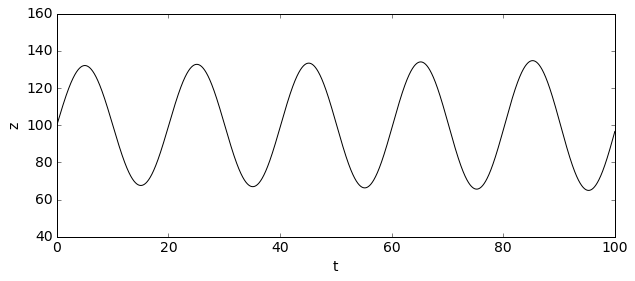

In [6]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both', labelsize = 14)
pyplot.xlabel('t', fontsize=14)
pyplot.ylabel('z', fontsize=14)
pyplot.plot(t,z,'k-');

In [7]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt
          

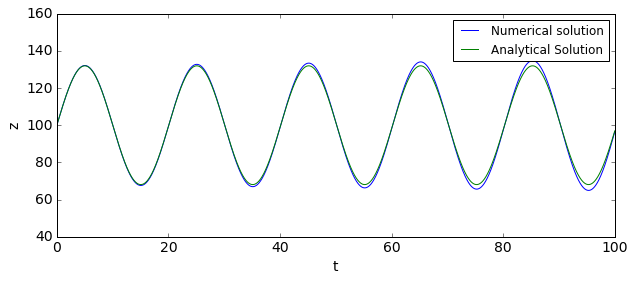

In [8]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize = 14)
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('z',fontsize=14)
pyplot.plot(t,z)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical solution','Analytical Solution']);